In [ ]:
%pip install getdist corner fgivenx deap numdifftools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -e git+https://github.com/ja-vazquez/SimpleMC#egg=simplemc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining simplemc from git+https://github.com/ja-vazquez/SimpleMC#egg=simplemc
  Updating ./src/simplemc clone
  Running command git fetch -q --tags
  Running command git reset --hard -q 6cb9d171ac907d5cb30d0cc4582eee02655b71bc
  Attempting uninstall: simplemc
    Found existing installation: simplemc 0.9.8
    Can't uninstall 'simplemc'. No files were found to uninstall.
  Running setup.py develop for simplemc


**Test that simplemc is successfully installed**

In [ ]:
import simplemc

**Import generic libraries**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np



# Cosmological calculator

## 1.1. Cosmic chronometers and Hubble function

In [ ]:
from simplemc.CosmoCalc import CosmoCalc

LCDM


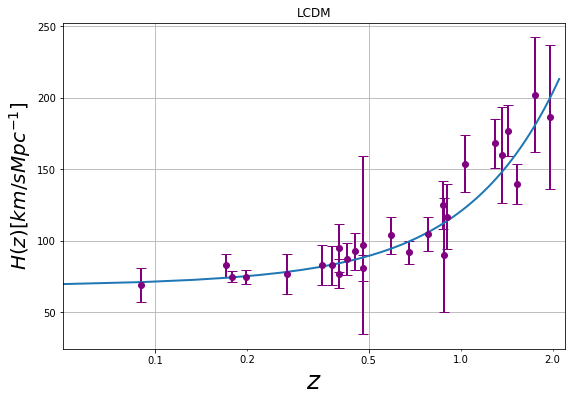

In [ ]:
C = CosmoCalc('LCDM', 'Hubble', plot_data=True, zmax=2.1)
plot = C.run_plot(lw='2')
plot.savefig('cosmocalc_hubble.png', dpi=300)

## 1.2. Compute the age of the Universe, the $Da/r_d(z=2)$ and $f \sigma_8(z=2)$




In [ ]:
C = CosmoCalc('LCDM', funct='Age')
C.Age(), C.DaOverrd(z=2), C.fs8(z=2)

LCDM
13.78Gys


(13.775572047446666, 25.392400314890214, 0.32184806231739976)

## 1.3. Distance modulus to LCDM and SNeIa datasets

LCDM


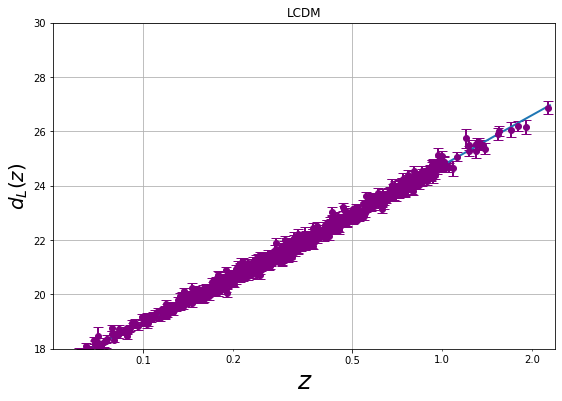

In [ ]:
C = CosmoCalc('LCDM', 'SNIa', plot_data=True, zmax=2.3)
plot = C.run_plot(lw='2')
# plot.savefig('cosmocalc_sn.png', dpi=300)

## 1.4 BAO data


LCDM


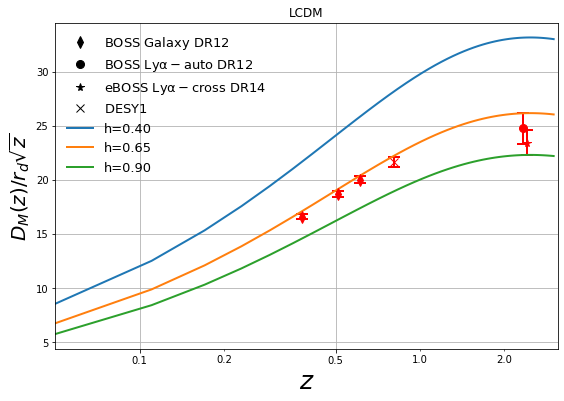

In [ ]:
C = CosmoCalc('LCDM', 'DaOverrd', 'h', 0.4, 0.9, plot_data=True)
plot = C.run_plot(lw='2')
# plot.savefig('cosmocalc_daoverrd.png', dpi=300)

## 1.5. $f \sigma_8$ measurements and $f \sigma_8(z)$ to CPL (owacdm) with several values to $w_a$

owaCDM


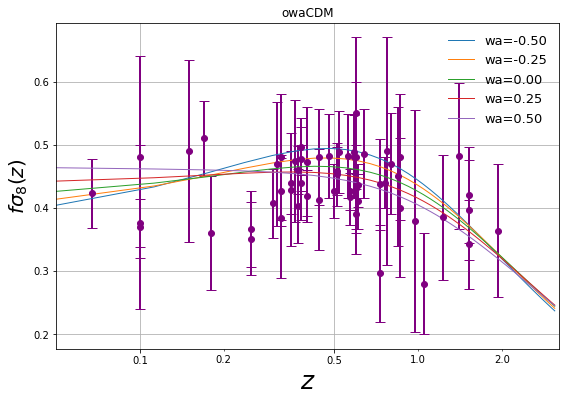

In [ ]:
C = CosmoCalc('owaCDM', 'fs8', 'wa', -0.5, 0.5, 5, zmax=3.1, plot_data=True)
plot = C.run_plot(lw='1')
# plot.savefig('cosmocalc_fs8data.png', dpi=300)

# MLE with genetic algorithms

In [ ]:
import matplotlib.pyplot as plt
from simplemc.DriverMC import DriverMC
from simplemc.plots.Plot_elipses import plot_elipses

In [ ]:
%cd /content/src/simplemc/

/content/src/simplemc


In [ ]:
analyzer1 = DriverMC(analyzername="ga_deap", model="LCDM", datasets="HD", chainsdir='simplemc/chains/')

Loading  /content/src/simplemc/simplemc/data/HDiagramCompilacion-data_31.txt
Loading  /content/src/simplemc/simplemc/data/HDiagramCompilacion-cov_31.txt
Eigenvalues of cov matrix: [16.0, 25.0, 64.0] ... 3844.0
Adding marginalising constant
Free parameters:
Om = 0.3038 +/- 0.05
Obh2 = 0.02234 +/- 0.001
h = 0.6821 +/- 0.05


In [ ]:
analyzer1.executer()

Minimizing... [0.3038, 0.02234, 0.6821] with bounds [(0.1, 0.5), (0.02, 0.025), (0.4, 0.9)]
gen	nevals	min    	avg   
0  	20    	9.34904	30.108
1  	16    	8.29556	20.8984
2  	14    	8.29556	25.031 
3  	16    	8.29556	21.0975
4  	16    	8.20547	16.5404
5  	17    	8.09436	16.6349
6  	14    	8.09436	15.3003
7  	17    	7.3422 	12.377 
8  	12    	7.33737	11.5643
9  	18    	7.29408	8.94296
10 	12    	7.29408	8.22988
11 	16    	7.29408	12.4521
12 	17    	7.29408	10.7496
13 	14    	7.29394	9.94689
14 	18    	7.28049	7.9385 
15 	13    	7.28049	14.9918
16 	16    	7.278  	11.7636
17 	16    	7.278  	9.8134 
18 	15    	7.27675	10.3429
19 	12    	7.27675	8.30349
20 	17    	7.26184	11.1742
21 	16    	7.26088	10.2024
22 	17    	7.26088	11.4275
23 	17    	7.26088	12.1569
24 	12    	7.26088	9.8698 
25 	16    	7.26088	9.86115
26 	16    	7.26088	10.4761
27 	16    	7.26088	9.07152
28 	13    	7.25682	9.4314 
29 	16    	7.25682	8.35468
30 	13    	7.25682	8.56773
31 	16    	7.25682	9.91993
32 	18    	7.25631	

INFO:simplemc:
Elapsed time: 0.263 minutes = 15.755 seconds


100	15    	7.25173	7.88688
-- Best Fitness =  7.251726926891076
- Best solutions are:
-- Best Om =  0.3222912305509723
-- Best Obh2 =  0.022016648406663737
-- Best h =  0.6791045936128557
Hessian [[7.07996114e+02 0.00000000e+00 8.19428251e+02]
 [0.00000000e+00 4.72589792e+06 0.00000000e+00]
 [8.19428251e+02 0.00000000e+00 1.46730974e+03]] [1.84546091e+02+0.j 1.99075976e+03+0.j 4.72589792e+06+0.j]
Covariance matrix 
 [[ 3.99390836e-03 -0.00000000e+00 -2.23042298e-03]
 [ 0.00000000e+00  2.11600000e-07  0.00000000e+00]
 [-2.23042298e-03  0.00000000e+00  1.92711295e-03]]
Om: 0.3223 +/- 0.0632
Obh2: 0.0220 +/- 0.0005
h: 0.6791 +/- 0.0439

Information criterions:

	AIC: -8.5035


{'analyzer': 'ga_deap',
 'crossover': 0.7,
 'max_generations': 100,
 'mutation': 0.3,
 'result': {'best_fitness': 7.251726926891076,
  'cov': array([[ 3.99390836e-03, -0.00000000e+00, -2.23042298e-03],
         [ 0.00000000e+00,  2.11600000e-07,  0.00000000e+00],
         [-2.23042298e-03,  0.00000000e+00,  1.92711295e-03]]),
  'maxlike': 7.251726926891076,
  'no_generations': 100,
  'param_fit': [0.3222912305509723, 0.022016648406663737, 0.6791045936128557],
  'population': 20,
  'samples': None,
  'weights': None},
 'time': 15.754694938659668}

# 3. Bayesian Inference

In [24]:
from simplemc.DriverMC import DriverMC
from simplemc.plots import Simple_Plots
from getdist import plots, MCSamples
import getdist

**MCMC**

In [25]:
analysis1 = DriverMC(analyzername='mcmc', model='LCDM', datasets='HD+SN')

Loading  /content/src/simplemc/simplemc/data/HDiagramCompilacion-data_31.txt
Loading  /content/src/simplemc/simplemc/data/HDiagramCompilacion-cov_31.txt
Eigenvalues of cov matrix: [16.0, 25.0, 64.0] ... 3844.0
Adding marginalising constant
Loading  /content/src/simplemc/simplemc/data/jla_binned_distances_31nodes_v1.txt
Loading  /content/src/simplemc/simplemc/data/cov_jla_binned_distances_31nodes_v1.txt
Eigenvalues of cov matrix: [0.0005070806003107862, 0.0005683516014088379, 0.0007392509073862131] ... 0.036459822761285926
Adding marginalising constant
Free parameters:
Om = 0.3038 +/- 0.05
Obh2 = 0.02234 +/- 0.001
h = 0.6821 +/- 0.05


In [26]:
res1 = analysis1.executer(GRstop=0.01)

INFO:simplemc:
	nsamp: 50000
	skip: 300
	temp: 2
	mcevidence: False
	GRstop: 0.01


Bounds: [0.1  0.02 0.4 ] [0.5   0.025 0.9  ]
Starting chain...

Re-initializing covariance matrix after burn-in
[[ 2.54804292e-04  2.35662844e-06 -1.00742065e-04]
 [ 2.35662844e-06  2.01545713e-07 -1.12525209e-06]
 [-1.00742065e-04 -1.12525209e-06  2.42274507e-04]]


---- Gelman-Rubin achived ---- 

Covariance matrix saved in .covmat file
 [[ 1.03500366e-03 -8.18443377e-07 -5.97808165e-04]
 [-8.18443377e-07  2.23114183e-07  1.00783547e-06]
 [-5.97808165e-04  1.00783547e-06  1.06107098e-03]] 

simplemc/chains/LCDM_phy_HD+SN_mcmc_1.txt


INFO:simplemc:
Elapsed time: 7.464 minutes = 447.865 seconds


Removed no burn in

getdist cov
 [[ 1.03436137e-03 -8.17935477e-07 -5.97437184e-04]
 [-8.17935477e-07  2.22975726e-07  1.00721004e-06]
 [-5.97437184e-04  1.00721004e-06  1.06041251e-03]] 

Om: 0.3070 +/- 0.0322
Obh2: 0.0220 +/- 0.0005
h: 0.6925 +/- 0.0326

Information criterions:

	AIC: 53.8226


In [27]:
pars_labels = ['${}$'.format(p.Ltxname) for p in analysis1.pars_info]

In [28]:
samples1 = res1['result']['samples']
weights1 = res1['result']['weights']

In [29]:
om1 = res1['result']['samples'][:,0]
obh21 = res1['result']['samples'][:,1]
h1 = res1['result']['samples'][:,2]


**Nested Sampling**

In [30]:
analysis2 = DriverMC(analyzername='nested', model='LCDM', datasets='HD+SN')

Loading  /content/src/simplemc/simplemc/data/HDiagramCompilacion-data_31.txt
Loading  /content/src/simplemc/simplemc/data/HDiagramCompilacion-cov_31.txt
Eigenvalues of cov matrix: [16.0, 25.0, 64.0] ... 3844.0
Adding marginalising constant
Loading  /content/src/simplemc/simplemc/data/jla_binned_distances_31nodes_v1.txt
Loading  /content/src/simplemc/simplemc/data/cov_jla_binned_distances_31nodes_v1.txt
Eigenvalues of cov matrix: [0.0005070806003107862, 0.0005683516014088379, 0.0007392509073862131] ... 0.036459822761285926
Adding marginalising constant
Free parameters:
Om = 0.3038 +/- 0.05
Obh2 = 0.02234 +/- 0.001
h = 0.6821 +/- 0.05


In [31]:
res2 = analysis2.executer(nlivepoints=100)

INFO:simplemc:Using 1 processor
INFO:simplemc:
	nlivepoints: 100
	accuracy: 0.01
	nested type: multi


it: 985 | ncall: 4982 | eff: 19.791 | logz: -29.1233 | dlogz: 0.0101 | loglstar: -23.9846 | point 0.30092216 0.02218237 0.69629623

INFO:simplemc:
Elapsed time: 7.128 minutes = 427.669 seconds



Covariance matrix saved in .covmat file
 [[ 8.65328286e-04 -2.52707174e-09 -4.68550924e-04]
 [-2.52707174e-09  2.26448021e-07 -4.07649121e-07]
 [-4.68550924e-04 -4.07649121e-07  1.05926219e-03]] 

simplemc/chains/LCDM_phy_HD+SN_nested_multi_1.txt
Removed no burn in

getdist cov
 [[ 8.63516128e-04 -2.52476765e-09 -4.67569687e-04]
 [-2.52476765e-09  2.25973998e-07 -4.06793415e-07]
 [-4.67569687e-04 -4.06793415e-07  1.05704389e-03]] 

Om: 0.3035 +/- 0.0294
Obh2: 0.0220 +/- 0.0005
h: 0.6908 +/- 0.0325

Information criterions:

	AIC: 53.8295


In [32]:
samples2 = res2['result']['samples']
weights2 = res2['result']['weights']
om2 = res2['result']['samples'][:,0]
obh22 = res2['result']['samples'][:,1]
h2 = res2['result']['samples'][:,2]

**Plot with GetDist**

In [35]:
# names = ["SN+BBAO", "SN+HD", "SN+HD+BBAO", "SN+HD+BBAO+Planck"]
labels =  ['{}'.format(p.Ltxname) for p in analysis1.pars_info]
labels, np.shape(samples1)

(['\\Omega_m', '\\Omega_{b}h^2', 'h'], (3200, 3))

In [39]:
samp1 = MCSamples(samples=samples1, names=labels, labels = labels, label='MCMC')
samp2 = MCSamples(samples=samples2, names = labels, labels = labels, label='Nested Sampling')

Removed no burn in
Removed no burn in


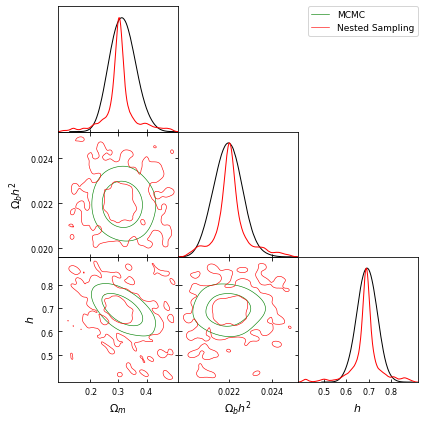

In [41]:
# Triangle plot
g = plots.get_subplot_plotter()
g.triangle_plot([samp1, samp2], filled=False, line_args={'lw':1},
                colors=['green', 'red', 'indigo'],
                settings={ 'smooth_scale_2D':0.8, 'smooth_scale_1D':0.6},)

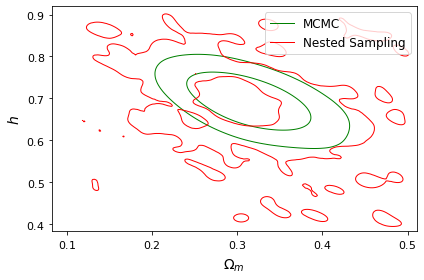

In [42]:
# Customized 2D filled comparison plot

g = plots.get_single_plotter(width_inch=6, ratio= 2. / 3.)
g.settings.legend_fontsize = 12
g.plot_2d([samp1, samp2], labels[0], labels[2], filled=False, line_args={'lw':1},
          colors=['green', 'red', 'indigo'], smooth_s=0.8)

g.add_legend(['MCMC', 'Nested Sampling'], legend_loc='upper right');